In [1]:
# Data Preprocessing
import pandas as pd
import numpy as np
import os

In [2]:
# Getting list of ham and spam file_names
ham_folder_path = '/Users/abhinavmahesh/Documents/Personal Projects/Getting Started with Spam Classification/Training Data/ham'
spam_folder_path = '/Users/abhinavmahesh/Documents/Personal Projects/Getting Started with Spam Classification/Training Data/spam'
ham_files = os.listdir(ham_folder_path)
spam_files = os.listdir(spam_folder_path)
# Creating Dataframe storing content of email and labeling as 0 for ham and 1 for spam
ham_pd = pd.DataFrame({'Email' : np.zeros(len(ham_files)), 'Label' : np.zeros(len(ham_files))})
spam_pd = pd.DataFrame({'Email' : np.zeros(len(spam_files)), 'Label' : np.ones(len(spam_files))})
# Adding content to Email column for ham_pd
for i in range(len(ham_files)):
    ham_file_name = ham_folder_path + '/' + ham_files[i]
    with open(ham_file_name, 'rb') as file:
        content = file.read()
    file.close()
    ham_pd['Email'][i] = content
# Adding content to Email column for spam_pd
for i in range(len(spam_files)):
    spam_file_name = spam_folder_path + '/' + spam_files[i]
    with open(spam_file_name, 'rb') as file:
        content = file.read()
    file.close()
    spam_pd['Email'][i] = content
# Creating a dataframe storing all the data
spam_ham_pd = pd.concat([ham_pd, spam_pd], ignore_index=True)

In [3]:
# Define functions that clean the contents of the email
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Convert email to text
def email_to_text(email):
    text = email.lower()
    # remove punctuations
    text = re.sub(r'[^\w\s]', '', text)
    # remove numbers and replace with the word number
    text = re.sub(r'[0-9]+','number',text)
    # remove hyperlinks
    text = re.sub(r'http\S+|www\S+', '', text)
    # remove extra newlines
    text = re.sub('\n+', '', text)
    # remove words longer than 10 characters
    text = re.sub(r'[a-z0-9]{10,}','',text)
    # remove extra whitespace
    text = re.sub('\\s+', ' ', text)
    return text

# Remove stopwords from text
def remove_stopwords(text):
    stopwords_list = stopwords.words('english')
    return ' '.join([word for word in text.split() if word not in stopwords_list])

# Use word lemmatization to further clean text
def lematize(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join(lemmatizer.lemmatize(word) for word in text.split())

In [4]:
# Add cleaned text of Subject and Content to dataframe
import email

spam_ham_pd['Subject'], spam_ham_pd['Content'] = None, None
for i in range(len(spam_ham_pd)):
    msg = email.message_from_bytes(spam_ham_pd['Email'][i])
    subject = str(msg['Subject'])
    content = ''
    spam_ham_pd['Subject'][i] = lematize(remove_stopwords(email_to_text(subject)))
    # handle emails with multiple parts by adding their contents
    if msg.is_multipart():
        for part in msg.walk():
            if part.get_content_type() == "text/plain":
                content += str(part.get_payload())
    else:
        content = str(msg.get_payload())
    spam_ham_pd['Content'][i] = lematize(remove_stopwords(email_to_text(content)))
spam_ham_pd


/var/folders/mm/cqt12vfs6m15tzv8kbj1q7_w0000gn/T/ipykernel_28138/4075057220.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_ham_pd['Subject'][i] = lematize(remove_stopwords(email_to_text(subject)))
/var/folders/mm/cqt12vfs6m15tzv8kbj1q7_w0000gn/T/ipykernel_28138/4075057220.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_ham_pd['Content'][i] = lematize(remove_stopwords(email_to_text(content)))


,Email,Label,Subject,Content
0,b'Return-Path: <Online#3.19846.2a-726zgP3UI7kT...,0.0,newscom investor battered stock regain ground,investor src altcnet investor src src src src ...
1,"b""From rssfeeds@jmason.org Mon Sep 30 13:43:4...",0.0,priceless rubens work stolen raid mansion,url date fourth art raid home targeted ira dub...
2,b'From fork-admin@xent.com Tue Sep 3 14:24:4...,0.0,making mesh move,making mesh movea new way give u fast mobile n...
3,b'From exmh-users-admin@redhat.com Wed Sep 11...,0.0,sorting,youre probably running exmh local machine im r...
4,b'From fork-admin@xent.com Mon Sep 2 16:22:1...,0.0,java kiddy,sun number sep number reza bfar ebuilt wrote n...
...,...,...,...,...
3297,b'From sitescooper-talk-admin@lists.sourceforg...,1.0,scoop haberdar olun,haber medya tm haberleri sadece tek siteden ta...
3298,b'From q10bvq9lvq1@prodigy.net Sun Sep 15 12:...,1.0,tax problem,tax problem owe irs money debt isnumber u help...
3299,b'From vbj101521@caramail.com Tue Aug 27 02:3...,1.0,custom website number complete,doctype html public html number website number...
3300,b'From biz2biz2446@Flashmail.com Mon Oct 7 2...,1.0,see company sale sky rocket number,stumbling greatest way marketing century simil...


In [6]:
# Save dataframe as csv file
spam_ham_pd.dropna(axis=0)
spam_ham_pd.reset_index(drop=True)
spam_ham_pd.to_csv(f"demo_spam_ham_data.csv", index = False)

<AxesSubplot: ylabel='Label'>

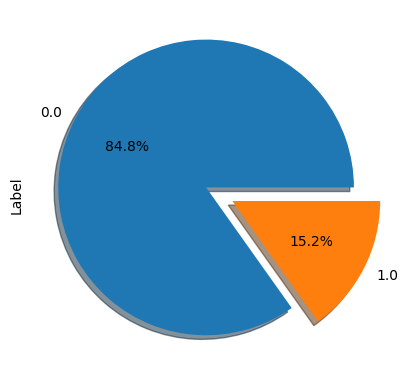

In [7]:
spam_ham_pd.Label.value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=[0.1,0.1])

In [8]:
# Feature Extraction
# Tfidf(Term Frequency * Inverse Document Frequency) used to transform data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Categorize x and y variables
x = spam_ham_pd.Content
y = spam_ham_pd.Label

# Create instance of vectorizer
vectorizer = TfidfVectorizer()

# tokenize and build vocab by fitting the data and then transforming it into a feature extraction layer
x = vectorizer.fit_transform(x)

# Split data into train and test set

# parameters are modifiable
# stratify ensures that the proportion of data is split evenly in both sets based on a variable 
# random_state results in random splitting of data which is reproduceable each time it is run, based on a random seed value
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 42)


In [9]:
# Model training (Training Classifier = GaussianNB)
# ML Algorithm used for prediction is a Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB

# Create an instance of the model
clf = GaussianNB()

# Train the model using training data x
clf.fit(x_train.toarray(), y_train)

# Returns an array predicting whether the testing data is spam (1) or ham (0) based on the testing data
clf.predict(x_test.toarray())

# Output of the score is the accuracy of the prediction
# accuracy of training data
print(clf.score(x_train.toarray(), y_train))

# accuracy of testing data
print(clf.score(x_test.toarray(), y_test))


0.9842487883683361
0.9261501210653753
